## Data Exploration ##

Notebook exploring various features of the dataset

In [1]:
# necessary libraries
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# load csv file with labels for training images
traindf = pd.read_csv('train.csv')
print(traindf.head())
len(traindf)

           Image         Id
0  0000e88ab.jpg  w_f48451c
1  0001f9222.jpg  w_c3d896a
2  00029d126.jpg  w_20df2c5
3  00050a15a.jpg  new_whale
4  0005c1ef8.jpg  new_whale


25361

In [3]:
# load list of test files into dataframe
filelist = os.listdir('test')
testdf = pd.DataFrame(filelist, columns=['Image'])
print(testdf.head())
len(testdf)

           Image
0  21253f840.jpg
1  769f8d32b.jpg
2  a69dc856e.jpg
3  79bee536e.jpg
4  7eb9a6f1b.jpg


7960

In [86]:
# function for viewing images
def show_imgs(imgs, path='train/', labeldf=None, title=None):
    '''
    Provided list of images (imgs) and a relative path (path), 
    plots the images in 3 columns (number of rows will vary).
    Parameter "labeldf" is a dataframe mapping images to labels.
    '''
    n = len(imgs)
    y = max(1, n//3) + (1 if (n//3>0 and n%3>0) else 0)
    x = n if n<3 else 3
    fig, ax = plt.subplots(nrows=y, ncols=x, figsize=(15,y*4))
    if title:
        fig.suptitle(title, fontsize=16)
    if labeldf is not None:
        labels = [labeldf.loc[labeldf['Image']==im, ['Id']].values[0][0] for im in imgs]
    else:
        labels = ['unlabeled' for i in range(n)]
    titles = ['{} - {}'.format(a, b) for a, b in zip(imgs, labels)]
    m = 0
    for i in range(y):
        for j in range(x):
            if m >= n:
                break
            img = Image.open(path+'/'+imgs[m])
            if y==1:
                ax[j].imshow(img)
                ax[j].set(title=titles[m])
            else:
                ax[i,j].imshow(img)
                ax[i,j].set(title=titles[m])
            m += 1

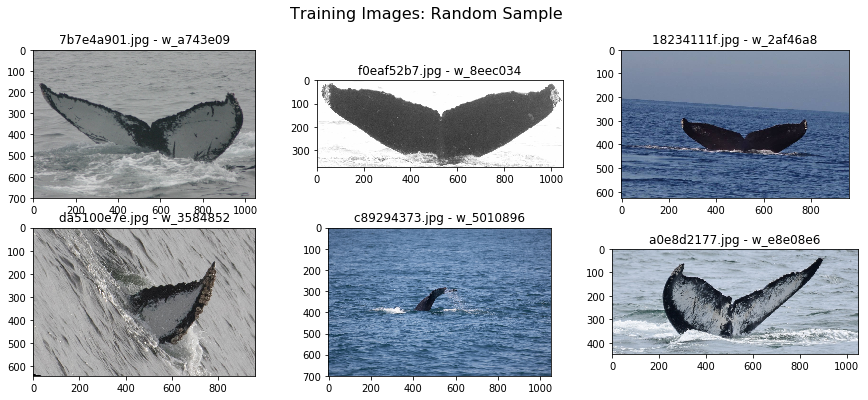

In [66]:
# display 6 random training images and their labels
n = random.sample(range(len(traindf)), 6)
imgs_df = traindf.iloc[n]
imgs = imgs_df.Image.tolist()
show_imgs(imgs, labeldf=imgs_df, title='Training Images: Random Sample')

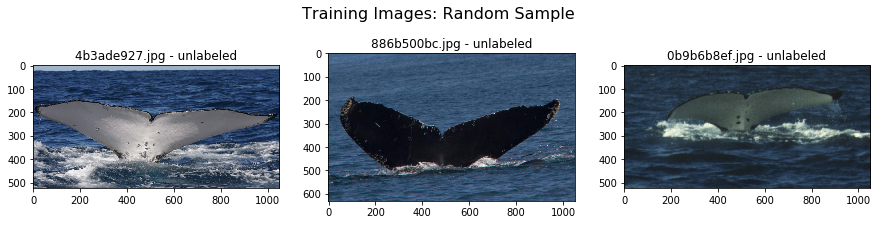

In [61]:
# display 3 random testing images
n = random.sample(range(len(testdf)), 3)
imgs_df = testdf.iloc[n]
imgs = imgs_df.Image.tolist()
show_imgs(imgs, path='test/', title='Training Images: Random Sample')

In [7]:
# What are the properties of the training images: width, height, and color mode?
# (appx execution time: 60 seconds)
traindf['Width']  = 0
traindf['Height'] = 0
traindf['Mode']   = ''
i = 0
for img in traindf.Image: 
    img = Image.open('train/'+img)
    width, height = img.size
    mode = img.mode
    traindf.loc[i, ['Width', 'Height', 'Mode']] = width, height, mode
    i += 1
print(traindf.head())

           Image         Id  Width  Height Mode
0  0000e88ab.jpg  w_f48451c   1050     700  RGB
1  0001f9222.jpg  w_c3d896a    758     325  RGB
2  00029d126.jpg  w_20df2c5   1050     497  RGB
3  00050a15a.jpg  new_whale   1050     525  RGB
4  0005c1ef8.jpg  new_whale   1050     525  RGB


In [8]:
# and the same test images?
testdf['Width']  = 0
testdf['Height'] = 0
testdf['Mode']   = ''
i = 0
for img in testdf.Image: 
    img = Image.open('test/'+img)
    width, height = img.size
    mode = img.mode
    testdf.loc[i, ['Width', 'Height', 'Mode']] = width, height, mode
    i += 1
print(testdf.head())

           Image  Width  Height Mode
0  21253f840.jpg   1050     700  RGB
1  769f8d32b.jpg   1050     590  RGB
2  a69dc856e.jpg   1050     574  RGB
3  79bee536e.jpg   1050     632  RGB
4  7eb9a6f1b.jpg   1050     293  RGB


In [9]:
# lets compute stats of those properties
i = 0
for df in [traindf, testdf]:
    w_mean = df['Width'].mean()
    w_std  = df['Width'].std()
    w_min  = df['Width'].min()
    w_max  = df['Width'].max()
    h_mean = df['Height'].mean()
    h_std  = df['Height'].std()
    h_min  = df['Height'].min()
    h_max  = df['Height'].max()
    cnt_rgb  = len(df[df['Mode'] == 'RGB'])
    cnt_grey = len(df[df['Mode'] == 'L'])
    pct_rgb = cnt_rgb / (cnt_rgb + cnt_grey)
    pct_grey = cnt_grey / (cnt_rgb + cnt_grey)
    if i==0:
        print('Properties of training images:')
    else:
        print('Properties of testing images:')
    print('Width:  mean: {:.1f}, std: {:.1f}, min: {}, max: {}'.format(w_mean, w_std, w_min, w_max))
    print('Height: mean: {:.1f}, std: {:.1f}, min: {}, max: {}'.format(h_mean, h_std, h_min, h_max))
    print('RGB: {} ({:.1%}), Grayscale: {} ({:.1%})\n'.format(cnt_rgb, pct_rgb, cnt_grey, pct_grey))
    i += 1

Properties of training images:
Width:  mean: 992.3, std: 267.2, min: 77, max: 5959
Height: mean: 512.9, std: 156.1, min: 30, max: 1575
RGB: 21975 (86.6%), Grayscale: 3386 (13.4%)

Properties of testing images:
Width:  mean: 997.2, std: 280.0, min: 126, max: 5959
Height: mean: 521.6, std: 159.7, min: 66, max: 1199
RGB: 7137 (89.7%), Grayscale: 823 (10.3%)



In [10]:
# how many "new_whale" images?
len(traindf[traindf.Id=='new_whale'])

9664

In [11]:
# remove unlabeled images
indx_to_drop = traindf[traindf.Id=='new_whale'].index.tolist()
traindf.drop(indx_to_drop, inplace=True)
traindf.reset_index(drop=True, inplace=True)
print(traindf.head())
len(traindf)

           Image         Id  Width  Height Mode
0  0000e88ab.jpg  w_f48451c   1050     700  RGB
1  0001f9222.jpg  w_c3d896a    758     325  RGB
2  00029d126.jpg  w_20df2c5   1050     497  RGB
3  000a6daec.jpg  w_dd88965   1050     458  RGB
4  0016b897a.jpg  w_64404ac   1050     450  RGB


15697

In [12]:
# create dataframe with distinct ids and count of images per id
ids = pd.DataFrame(traindf['Id'].unique(), columns=['Id'])
ids['Count'] = 0
i = 0
for id in ids.Id:
    cnt  = len(traindf[traindf['Id'] == id])
    ids.loc[i, 'Count'] = cnt
    i += 1
print(ids.head())
len(ids)

          Id  Count
0  w_f48451c     14
1  w_c3d896a      4
2  w_20df2c5      4
3  w_dd88965     16
4  w_64404ac      5


5004

In [13]:
# show basic stats
print(ids.Count.describe())

count    5004.000000
mean        3.136890
std         4.610151
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        73.000000
Name: Count, dtype: float64


Text(0.5, 1.0, 'Images per Label (in log scale)')

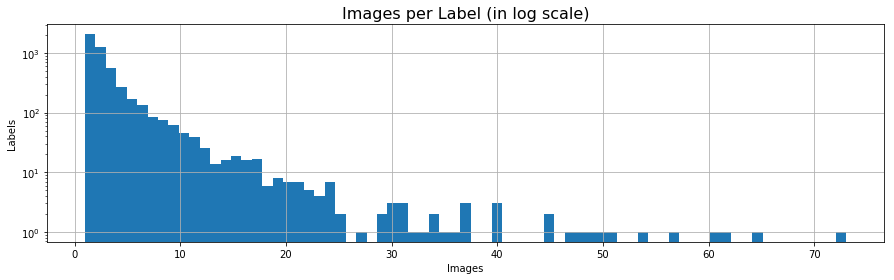

In [14]:
# show as histogram
ids.hist(column='Count', bins=ids.Count.max(), figsize=(15,4), log=True)
plt.xlabel('Images')
plt.ylabel('Labels')
plt.title('Images per Label (in log scale)', fontsize=16)

In [15]:
print(1285/5004)
len(ids[ids.Count==2])

0.25679456434852116


1285

## Random code past this point ##

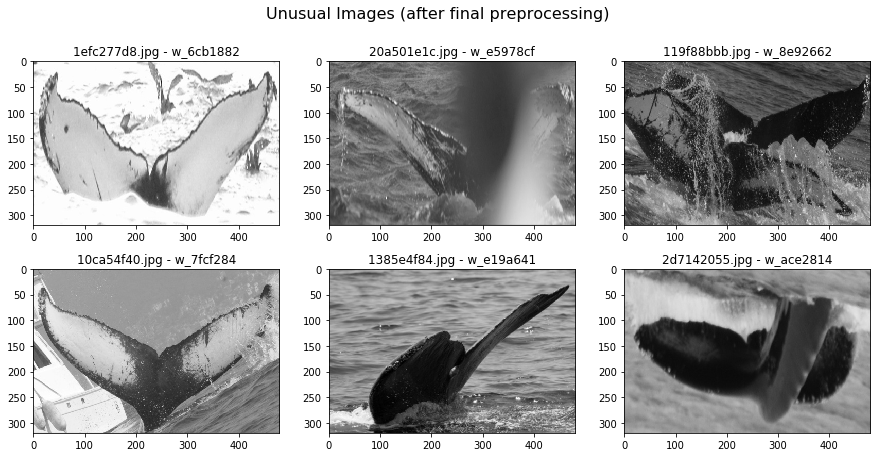

In [58]:
imgs = ['1efc277d8.jpg',
        '20a501e1c.jpg',
        '119f88bbb.jpg',
        '10ca54f40.jpg',
        '1385e4f84.jpg',
        '2d7142055.jpg']
show_imgs(imgs, labeldf=traindf, path='cropped_cleaned/train', title='Unusual Images (after final preprocessing)')

In [71]:
img = Image.open('capstone/images/cnn_basic.png')
newimg = img.resize((650,350))
newimg.save('capstone/images/cnn_basic_2.png')

In [73]:
df.head()

AttributeError: 'function' object has no attribute 'head'

In [75]:
import imagehash

df1 = traindf.iloc[0:5000].copy()

# compute phash for each remaining image
df1['Hash'] = 0
i = 0
for img in df1.Image:
    img = 'cropped_cleaned/train/' + img
    img = Image.open(img)
    # h = imagehash.average_hash(img)
    h = imagehash.phash(img)
    df1.at[i,'Hash'] = h
    i += 1
# drop columns Processed and Attention - we don't need them any more
#df3.drop(['Processed', 'Attention'], axis=1, inplace=True)
print(df1.head())
print(len(df1))

           Image         Id  Width  Height Mode              Hash
0  0000e88ab.jpg  w_f48451c   1050     700  RGB  f01ddaf6d2340770
1  0001f9222.jpg  w_c3d896a    758     325  RGB  bacec2b7e888c703
2  00029d126.jpg  w_20df2c5   1050     497  RGB  bfcad234a5290f0b
3  000a6daec.jpg  w_dd88965   1050     458  RGB  e91b8cc2f2707279
4  0016b897a.jpg  w_64404ac   1050     450  RGB  e99a8624bfe19836
5000


In [94]:
df1.head()

,Image,Id,Width,Height,Mode,Hash
0,0000e88ab.jpg,w_f48451c,1050,700,RGB,f01ddaf6d2340770
1,0001f9222.jpg,w_c3d896a,758,325,RGB,bacec2b7e888c703
2,00029d126.jpg,w_20df2c5,1050,497,RGB,bfcad234a5290f0b
3,000a6daec.jpg,w_dd88965,1050,458,RGB,e91b8cc2f2707279
4,0016b897a.jpg,w_64404ac,1050,450,RGB,e99a8624bfe19836


In [76]:
# or load previously saved dataframe
df_diff = pd.read_csv('cropped_cleaned/dfdiff.csv')

print(df_diff.head())
len(df_diff)

          Image1         Image2
0  4cb90f820.jpg  ffa5fa27e.jpg
1  78f190f6c.jpg  935851f78.jpg
2  73cd730e8.jpg  ff6e12f04.jpg
3  4ab9d233c.jpg  55feede27.jpg
4  f31817534.jpg  ff31cf802.jpg


500

In [79]:
df_diff['Diff'] = 0
i = 0
for r in df_diff.itertuples():
    img1 = r.Image1
    img2 = r.Image2
    im1 = Image.open(('cropped_cleaned/train/'+img1))
    im2 = Image.open(('cropped_cleaned/train/'+img2))
    h1 = imagehash.phash(im1)
    h2 = imagehash.phash(im2)
    diff = abs(h1-h2)
    df_diff.at[i,'Diff'] = diff
    i += 1
print(df_diff.head())

          Image1         Image2  Diff
0  4cb90f820.jpg  ffa5fa27e.jpg     6
1  78f190f6c.jpg  935851f78.jpg     6
2  73cd730e8.jpg  ff6e12f04.jpg     6
3  4ab9d233c.jpg  55feede27.jpg    10
4  f31817534.jpg  ff31cf802.jpg     6


In [96]:
df_diff[df_diff.Diff==4]

,Image1,Image2,Diff
5,0912b97e6.jpg,42f60d8c9.jpg,4
11,0ef17acd2.jpg,c090d5417.jpg,4
60,6cf35eb65.jpg,ab5090211.jpg,4
66,837a5764d.jpg,f38e55393.jpg,4
73,ee7653a0e.jpg,f22116280.jpg,4
83,8eccdf3d4.jpg,c884e5997.jpg,4
84,e8201dad9.jpg,f0f3de7c4.jpg,4
99,58f915065.jpg,89e3e088c.jpg,4
127,1e9aa4f1f.jpg,72983b939.jpg,4
128,c7a6d5616.jpg,ea2153501.jpg,4


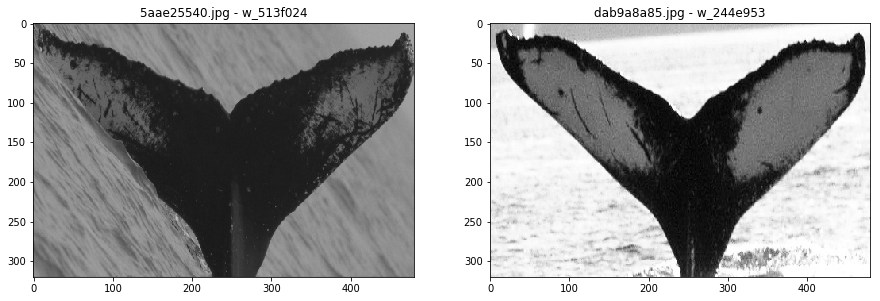

In [98]:
#imgs = ['2d6617ada.jpg','3f57bd36d.jpg']
imgs = ['5aae25540.jpg','dab9a8a85.jpg']
show_imgs(imgs, labeldf=traindf, path='cropped_cleaned/train/')